# DS05 Assignment

**libraries**

these libraries and modules are essential tools for various data science tasks, including data manipulation, machine learning, and data visualization. They provide a comprehensive set of functionalities for working with data and building machine learning models.

In [ ]:
#These libraries and modules are essential tools for data analysis,
#machine learning, and data visualization,
#making them suitable for various data science tasks.
#import the necessary libray

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

**Data Loading and Exploration**

load or extract a dataset into your Python environment using the libraries you've imported.

use the appropriate Pandas function to read it. Let's assume have a CSV file named "your_dataset.csv"

In [ ]:
from google.colab import drive
# Mount Google Drive to /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/DS05-AS'
filename = '2018.csv.zip'
# Assuming your file is a compressed CSV file (ZIP)
df_flight = csv = pd.read_csv(os.path.join(data_path, filename))

In [ ]:
data_path = '/content/drive/MyDrive/DS05-AS'
filename = 'airports.csv'
# Assuming your file is a compressed CSV file
airport_df = csv = pd.read_csv(os.path.join(data_path, filename))

**Joint Dataset**

 to join the two dataframes flight_df and df_flight based on a common column, let's assume the common column is IATA_CODE.

to join df_flight with flight_df based on the 'ORIGIN' column in df_flight and the 'IATA_CODE' column in flight_df. Adjust the column names as needed based on data.

The how='left' parameter specifies a left join, meaning that all rows from df_flight will be included in the merged dataframe, and matching rows from flight_df will be added where available. If you want a different type of join, such as inner join (how='inner'), right join (how='right'), or outer join (how='outer'), you can choose accordingly.

Make sure to adjust the column names and join conditions based on the structure of  data.




User
make it outer
 to perform an outer join, you can modify the code as follows:

python
Copy code
new_flight_df = pd.merge(df_flight, flight_df, left_on='ORIGIN', right_on='IATA_CODE', how='outer')
This will include all rows from both df_flight and flight_df, and fill in missing values with NaN where there are no matches. Adjust the column names based on  actual data structure.

Remember that in an outer join, the resulting dataframe will contain all rows from both dataframes, and missing values will be filled with NaN where there is no match.

In [ ]:
#using the pd.merge() function to perform an outer join between the df_flight and flight_df dataframes
#based on the 'ORIGIN' column in df_flight and the 'IATA_CODE' column in flight_df.


new_flight_df = pd.merge(df_flight, airport_df, left_on='ORIGIN', right_on='IATA_CODE', how='outer')

new_flight_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE,AIRPORT,CITY
0,2018-01-01,UA,2429.0,EWR,DEN,1517.0,1512.0,-5.0,15.0,1527.0,...,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Liberty International Airport,Newark
1,2018-01-01,UA,2415.0,EWR,PDX,825.0,822.0,-3.0,15.0,837.0,...,2434.0,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Liberty International Airport,Newark
2,2018-01-01,UA,2414.0,EWR,ATL,1044.0,1055.0,11.0,11.0,1106.0,...,746.0,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Liberty International Airport,Newark
3,2018-01-01,UA,2411.0,EWR,SMF,1810.0,1922.0,72.0,16.0,1938.0,...,2500.0,7.0,0.0,0.0,0.0,18.0,NaN,EWR,Newark Liberty International Airport,Newark
4,2018-01-01,UA,2406.0,EWR,TYS,830.0,844.0,14.0,20.0,904.0,...,631.0,NaN,NaN,NaN,NaN,NaN,NaN,EWR,Newark Liberty International Airport,Newark


merge has been successfully performed, and the resulting dataframe new_flight_df has columns from both df_flight and flight_df. The common column 'ORIGIN' from df_flight and 'IATA_CODE' from flight_df has been used for the outer join.

# data processing

In [ ]:
new_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213451 entries, 0 to 7213450
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    float64
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

The information you provided indicates that your merged dataframe new_flight_df has 7,213,451 entries and 31 columns. Here's a summary of the columns and their data types:

Numeric Columns (dtype=float64):

OP_CARRIER_FL_NUM
CRS_DEP_TIME
DEP_TIME
DEP_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
CRS_ARR_TIME
ARR_TIME
ARR_DELAY
CANCELLED
DIVERTED
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
DISTANCE
CARRIER_DELAY
WEATHER_DELAY
NAS_DELAY
SECURITY_DELAY
LATE_AIRCRAFT_DELAY
Unnamed: 27

bject Columns (dtype=object):

FL_DATE
OP_CARRIER
ORIGIN
DEST
CANCELLATION_CODE
IATA_CODE
AIRPORT
CITY

The memory usage is around 1.7+ GB. It's worth noting that if you encounter performance issues or need to optimize memory usage, you may consider converting some columns to more memory-efficient data types (e.g., using pd.to_datetime for date columns or using pd.Categorical for categorical columns).











check for missing data or NaN values in your DataFrame using the isnull() function, followed by sum() to count the number of missing values in each column.

This will print the count of missing values for each column in your DataFrame. If a column has no missing values, the count will be 0.

In [ ]:
missing_values = new_flight_df.isnull().sum()
print(missing_values)


FL_DATE                      5
OP_CARRIER                   5
OP_CARRIER_FL_NUM            5
ORIGIN                       5
DEST                         5
CRS_DEP_TIME                 5
DEP_TIME                112322
DEP_DELAY               117239
TAXI_OUT                115835
WHEELS_OFF              115834
WHEELS_ON               119251
TAXI_IN                 119251
CRS_ARR_TIME                 5
ARR_TIME                119250
ARR_DELAY               137045
CANCELLED                    5
CANCELLATION_CODE      7096867
DIVERTED                     5
CRS_ELAPSED_TIME            15
ACTUAL_ELAPSED_TIME     134447
AIR_TIME                134447
DISTANCE                     5
CARRIER_DELAY          5860741
WEATHER_DELAY          5860741
NAS_DELAY              5860741
SECURITY_DELAY         5860741
LATE_AIRCRAFT_DELAY    5860741
Unnamed: 27            7213451
IATA_CODE                25019
AIRPORT                  25019
CITY                     30341
dtype: int64


Now can decide how to handle the missing values. Options include imputation (filling in missing values with a calculated value), dropping columns or rows with too many missing values, or other strategies depending on the nature of your data and your analysis goals.

**Filling missing** values can be done using various strategies, depending on the nature of your data. For numerical columns, you might choose to fill missing values with the mean, median, or a specific constant value.

This code fills missing values in numerical columns with the mean and in categorical columns with the mode. Adjust the filling strategy based on the characteristics of data and your analysis goals.

In [ ]:
# Filling missing values for numerical columns with the mean
numerical_columns = new_flight_df.select_dtypes(include=['float64']).columns
new_flight_df[numerical_columns] = new_flight_df[numerical_columns].fillna(new_flight_df[numerical_columns].mean())

# Filling missing values for categorical columns with the mode
categorical_columns = new_flight_df.select_dtypes(include=['object']).columns
new_flight_df[categorical_columns] = new_flight_df[categorical_columns].fillna(new_flight_df[categorical_columns].mode().iloc[0])

new_flight_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE,AIRPORT,CITY
0,2018-01-01,UA,2429.0,EWR,DEN,1517.0,1512.0,-5.0,15.0,1527.0,...,1605.0,19.455006,3.636459,15.885471,0.093539,25.64412,NaN,EWR,Newark Liberty International Airport,Newark
1,2018-01-01,UA,2415.0,EWR,PDX,825.0,822.0,-3.0,15.0,837.0,...,2434.0,19.455006,3.636459,15.885471,0.093539,25.64412,NaN,EWR,Newark Liberty International Airport,Newark
2,2018-01-01,UA,2414.0,EWR,ATL,1044.0,1055.0,11.0,11.0,1106.0,...,746.0,19.455006,3.636459,15.885471,0.093539,25.64412,NaN,EWR,Newark Liberty International Airport,Newark
3,2018-01-01,UA,2411.0,EWR,SMF,1810.0,1922.0,72.0,16.0,1938.0,...,2500.0,7.000000,0.000000,0.000000,0.000000,18.00000,NaN,EWR,Newark Liberty International Airport,Newark
4,2018-01-01,UA,2406.0,EWR,TYS,830.0,844.0,14.0,20.0,904.0,...,631.0,19.455006,3.636459,15.885471,0.093539,25.64412,NaN,EWR,Newark Liberty International Airport,Newark


It seems that the column 'Unnamed: 27' still contains NaN values. to address this specifically, choose to drop this column or fill its missing values with a particular value.

Replace 0 with the desired value you want to use.

In [ ]:
# Replace NaN values in 'Unnamed: 27' with a specific value, for example, 0
new_flight_df['Unnamed: 27'] = new_flight_df['Unnamed: 27'].fillna(0)

new_flight_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE,AIRPORT,CITY
0,2018-01-01,UA,2429.0,EWR,DEN,1517.0,1512.0,-5.0,15.0,1527.0,...,1605.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
1,2018-01-01,UA,2415.0,EWR,PDX,825.0,822.0,-3.0,15.0,837.0,...,2434.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
2,2018-01-01,UA,2414.0,EWR,ATL,1044.0,1055.0,11.0,11.0,1106.0,...,746.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
3,2018-01-01,UA,2411.0,EWR,SMF,1810.0,1922.0,72.0,16.0,1938.0,...,2500.0,7.000000,0.000000,0.000000,0.000000,18.00000,0.0,EWR,Newark Liberty International Airport,Newark
4,2018-01-01,UA,2406.0,EWR,TYS,830.0,844.0,14.0,20.0,904.0,...,631.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark


converted are successful for 'Unnamed: 27' to 0

in the previous info() show that FL_DATE Dtyoe are object ** now it need to changes the **FL_DATE Dtyoevb to datetime

This code will convert the 'FL_DATE' column in new_flight_df to a datetime format with the specified format '%Y-%m-%d'. The info() method will then display the updated information about the DataFrame, including the data types of each column.

In [ ]:
new_flight_df['FL_DATE'] = pd.to_datetime(new_flight_df['FL_DATE'], format='%Y-%m-%d')

new_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213451 entries, 0 to 7213450
Data columns (total 31 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    float64       
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         float64       
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         float64       
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

successfully converted the 'FL_DATE' column to the datetime64[ns] format in your DataFrame new_flight_df. Now, the 'FL_DATE' column is of datetime type, which will make it easier to work with date-related operations.

# Data Transformation
Data transformation is also the middle step of the ETL (extract, transform, load) process, which is performed by data warehouse software. Typically, data engineers, data scientists, and data analysts use domain-specific languages such as SQL or scripting languages such as Python to transform data.

**Now rename** method to rename the columns in your DataFrame.

This code will rename the specified columns in your DataFrame. Adjust the names as needed. If you print the column names using new_flight_df.columns,

In [ ]:
new_flight_df = new_flight_df.rename(columns={
    'FL DATE': 'FLY DATE',
    'OPS CARRIER': 'OPS CARRIER',
    'OP CARRIER FLY NO': 'OP CARRIER FLY NO',
    'CRS DEP TIME': 'CRS DEP TIME',
    'DEP TIME': 'DEP TIME',
    'DEP DELAY': 'DEP DELAY',
    'TAXI OUT': 'TAXI OUT',
    'WHEELS OFF': 'WHEELS OFF',
    'ARR TIME': 'ARR TIME',
    'ARR DELAY': 'ARR DELAY',
    'CARRIER DELAY': 'CARRIER DELAY',
    'WEATHER DELAY': 'WEATHER DELAY',
    'NAS DELAY': 'NAS DELAY',
    'SECURITY DELAY': 'SECURITY DELAY',
    'LATE AIRCRAFT DELAY': 'LATE AIRCRAFT DELAY',
    'IATA CODE': 'IATA CODE'
})

# Replace underscores with spaces in specified column names
new_flight_df.columns = new_flight_df.columns.str.replace('_', ' ')


new_flight_df.head()

,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,TAXI OUT,WHEELS OFF,...,DISTANCE,CARRIER DELAY,WEATHER DELAY,NAS DELAY,SECURITY DELAY,LATE AIRCRAFT DELAY,Unnamed: 27,IATA CODE,AIRPORT,CITY
0,2018-01-01,UA,2429.0,EWR,DEN,1517.0,1512.0,-5.0,15.0,1527.0,...,1605.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
1,2018-01-01,UA,2415.0,EWR,PDX,825.0,822.0,-3.0,15.0,837.0,...,2434.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
2,2018-01-01,UA,2414.0,EWR,ATL,1044.0,1055.0,11.0,11.0,1106.0,...,746.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark
3,2018-01-01,UA,2411.0,EWR,SMF,1810.0,1922.0,72.0,16.0,1938.0,...,2500.0,7.000000,0.000000,0.000000,0.000000,18.00000,0.0,EWR,Newark Liberty International Airport,Newark
4,2018-01-01,UA,2406.0,EWR,TYS,830.0,844.0,14.0,20.0,904.0,...,631.0,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark


renaming process was successful, and the new column names sound better.



create a new column 'Flight_status' in your DataFrame based on the condition you've described. This code adds a new column 'Flight_status' to your DataFrame, and for each row, it checks if the value in the 'ARR DELAY' column is less than 15. If it is, it assigns 0 (on time); otherwise, it assigns 1 (delayed).

In [ ]:
# Create a new column 'Flight_status' based on 'ARR DELAY'
new_flight_df['Flight_status'] = new_flight_df['ARR DELAY'].apply(lambda x: 0 if x < 15 else 1)
new_flight_df.head()

,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,TAXI OUT,WHEELS OFF,...,CARRIER DELAY,WEATHER DELAY,NAS DELAY,SECURITY DELAY,LATE AIRCRAFT DELAY,Unnamed: 27,IATA CODE,AIRPORT,CITY,Flight_status
0,2018-01-01,UA,2429.0,EWR,DEN,1517.0,1512.0,-5.0,15.0,1527.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
1,2018-01-01,UA,2415.0,EWR,PDX,825.0,822.0,-3.0,15.0,837.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
2,2018-01-01,UA,2414.0,EWR,ATL,1044.0,1055.0,11.0,11.0,1106.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
3,2018-01-01,UA,2411.0,EWR,SMF,1810.0,1922.0,72.0,16.0,1938.0,...,7.000000,0.000000,0.000000,0.000000,18.00000,0.0,EWR,Newark Liberty International Airport,Newark,1
4,2018-01-01,UA,2406.0,EWR,TYS,830.0,844.0,14.0,20.0,904.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0


use set_index('IATA_CODE')['AIRPORT'].to_dict() to create a dictionary (airport_dict) mapping IATA codes to airport names. I then use replace to replace the 'ORIGIN' and 'DEST' codes with their corresponding airport names based on the dictionary. This should achieve the goal of replacing the codes with the actual airport names.

In [ ]:
# Create a dictionary mapping IATA codes to airport names
airport_dict = new_flight_df.set_index('IATA CODE')['AIRPORT'].to_dict()

# Replace 'ORIGIN' and 'DEST' codes with airport names
new_flight_df['ORIGIN'] = new_flight_df['ORIGIN'].replace(airport_dict)
new_flight_df['DEST'] = new_flight_df['DEST'].replace(airport_dict)
new_flight_df.head()

,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,TAXI OUT,WHEELS OFF,...,CARRIER DELAY,WEATHER DELAY,NAS DELAY,SECURITY DELAY,LATE AIRCRAFT DELAY,Unnamed: 27,IATA CODE,AIRPORT,CITY,Flight_status
0,2018-01-01,UA,2429.0,Newark Liberty International Airport,Denver International Airport,1517.0,1512.0,-5.0,15.0,1527.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
1,2018-01-01,UA,2415.0,Newark Liberty International Airport,Portland International Airport,825.0,822.0,-3.0,15.0,837.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
2,2018-01-01,UA,2414.0,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,1044.0,1055.0,11.0,11.0,1106.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0
3,2018-01-01,UA,2411.0,Newark Liberty International Airport,Sacramento International Airport,1810.0,1922.0,72.0,16.0,1938.0,...,7.000000,0.000000,0.000000,0.000000,18.00000,0.0,EWR,Newark Liberty International Airport,Newark,1
4,2018-01-01,UA,2406.0,Newark Liberty International Airport,McGhee Tyson Airport,830.0,844.0,14.0,20.0,904.0,...,19.455006,3.636459,15.885471,0.093539,25.64412,0.0,EWR,Newark Liberty International Airport,Newark,0


This code will convert the specified columns to the 'category' data type. This can be helpful in terms of memory usage and performance, especially if the columns have a limited number of unique values. After running this code, the specified columns in new_flight_df will be of the 'category' and 'interger' data type.

In [ ]:
# List of columns to convert to 'category'
columns_to_convert = ['OP CARRIER', 'OP CARRIER FL NUM', 'ORIGIN', 'DEST', 'IATA CODE', 'AIRPORT', 'CITY', 'Flight_status']

# Convert the specified columns to 'category'
new_flight_df[columns_to_convert] = new_flight_df[columns_to_convert].astype('category')

# Columns to convert to integer
columns_to_convert = ['FL DATE','CRS DEP TIME', 'DEP TIME', 'DEP DELAY', 'TAXI OUT', 'WHEELS OFF', 'WHEELS ON', 'TAXI IN', 'CRS ARR TIME', 'ARR TIME', 'ARR DELAY', 'CANCELLED', 'DIVERTED', 'CRS ELAPSED TIME', 'ACTUAL ELAPSED TIME', 'AIR TIME', 'DISTANCE', 'CARRIER DELAY', 'WEATHER DELAY', 'NAS DELAY', 'SECURITY DELAY', 'LATE AIRCRAFT DELAY', 'Unnamed: 27']

# Convert specified columns to integer
new_flight_df[columns_to_convert] = new_flight_df[columns_to_convert].astype(int)

new_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213451 entries, 0 to 7213450
Data columns (total 32 columns):
 #   Column               Dtype   
---  ------               -----   
 0   FL DATE              int64   
 1   OP CARRIER           category
 2   OP CARRIER FL NUM    category
 3   ORIGIN               category
 4   DEST                 category
 5   CRS DEP TIME         int64   
 6   DEP TIME             int64   
 7   DEP DELAY            int64   
 8   TAXI OUT             int64   
 9   WHEELS OFF           int64   
 10  WHEELS ON            int64   
 11  TAXI IN              int64   
 12  CRS ARR TIME         int64   
 13  ARR TIME             int64   
 14  ARR DELAY            int64   
 15  CANCELLED            int64   
 16  CANCELLATION CODE    object  
 17  DIVERTED             int64   
 18  CRS ELAPSED TIME     int64   
 19  ACTUAL ELAPSED TIME  int64   
 20  AIR TIME             int64   
 21  DISTANCE             int64   
 22  CARRIER DELAY        int64   
 23  WEATHER

**drop** the specified columns from your DataFrame, you can use the drop method. Here's an example:

This code will remove the specified columns from your DataFrame. Make sure to adjust the column names and DataFrame variable according to your actual DataFrame structure and variable names.

In [ ]:
columns_to_drop = ['CANCELLATION CODE', 'TAXI OUT', 'WHEELS OFF', 'NAS DELAY', 'SECURITY DELAY', 'Unnamed: 27', 'IATA CODE', 'AIRPORT', 'CITY','TAXI IN','CANCELLED','DIVERTED']

new_flight_df = new_flight_df.drop(columns=columns_to_drop)

new_flight_df.head()

,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,WHEELS ON,CRS ARR TIME,ARR TIME,ARR DELAY,CRS ELAPSED TIME,ACTUAL ELAPSED TIME,AIR TIME,DISTANCE,CARRIER DELAY,WEATHER DELAY,LATE AIRCRAFT DELAY,Flight_status
0,1514764800000000000,UA,2429.0,Newark Liberty International Airport,Denver International Airport,1517,1512,-5,1712,1745,1722,-23,268,250,225,1605,19,3,25,0
1,1514764800000000000,UA,2415.0,Newark Liberty International Airport,Portland International Airport,825,822,-3,1104,1135,1109,-26,370,347,327,2434,19,3,25,0
2,1514764800000000000,UA,2414.0,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,1044,1055,11,1310,1318,1315,-3,154,140,124,746,19,3,25,0
3,1514764800000000000,UA,2411.0,Newark Liberty International Airport,Sacramento International Airport,1810,1922,72,2157,2136,2201,25,386,339,319,2500,7,0,18,1
4,1514764800000000000,UA,2406.0,Newark Liberty International Airport,McGhee Tyson Airport,830,844,14,1052,1049,1055,6,139,131,108,631,19,3,25,0


**visualization**
This code will create a count plot that shows the distribution of flight statuses ('on time' vs. 'delayed'). Adjust the plot parameters as needed for your specific preferences.

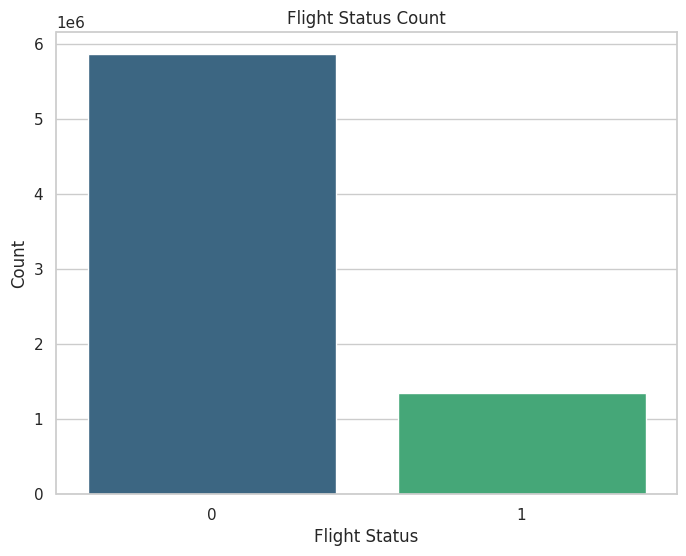

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a count plot for 'Flight_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Flight_status', data=new_flight_df, palette='viridis')
plt.title('Flight Status Count')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

<ipython-input-17-6c50dc0f42a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_flight_df.corr()


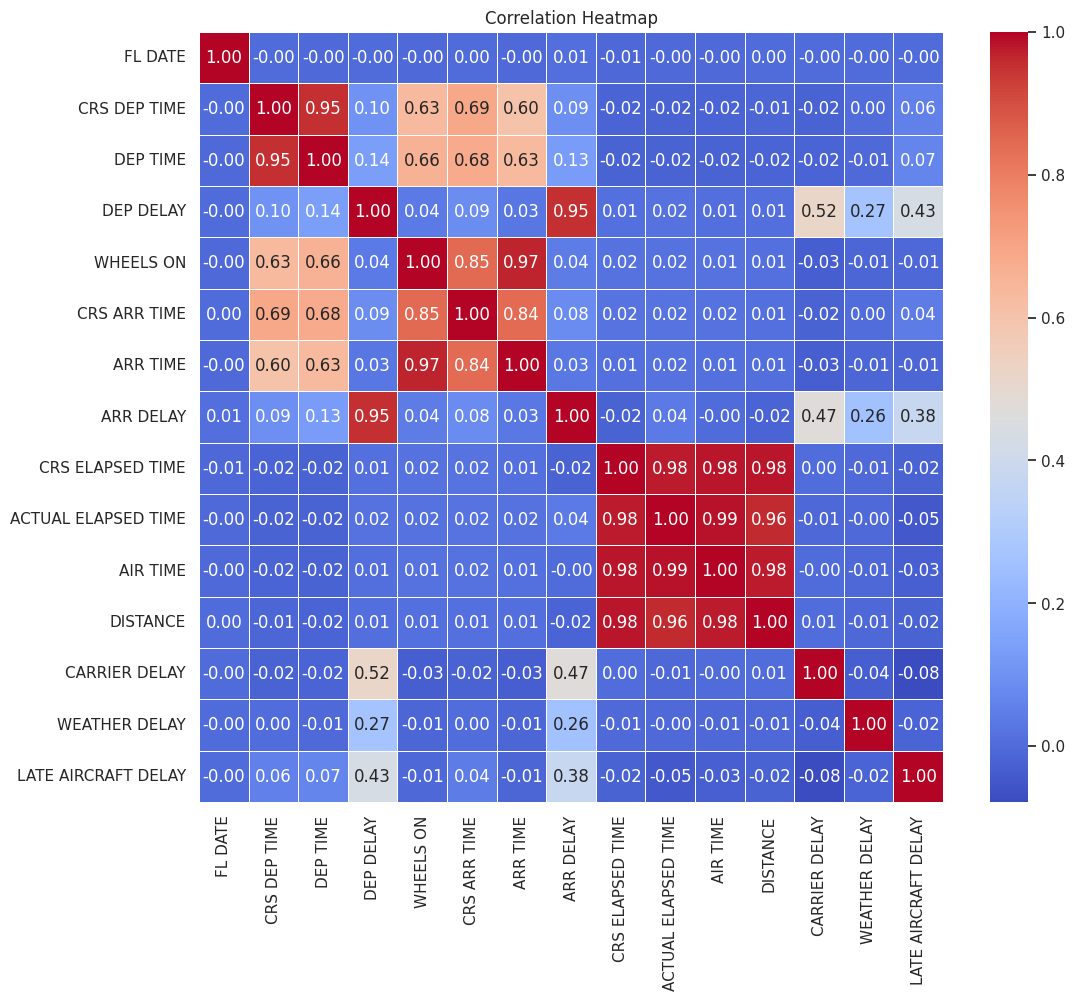

In [ ]:
# Generate correlation matrix
correlation_matrix = new_flight_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
new_flight_df.describe()

,FL DATE,CRS DEP TIME,DEP TIME,DEP DELAY,WHEELS ON,CRS ARR TIME,ARR TIME,ARR DELAY,CRS ELAPSED TIME,ACTUAL ELAPSED TIME,AIR TIME,DISTANCE,CARRIER DELAY,WEATHER DELAY,LATE AIRCRAFT DELAY
count,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06,7.213451e+06
mean,1.530594e+18,1.329687e+03,1.333841e+03,9.954095e+00,1.462159e+03,1.486341e+03,1.466771e+03,5.047658e+00,1.411356e+02,1.364906e+02,1.114927e+02,7.999895e+02,1.908533e+01,3.119353e+00,2.512079e+01
std,8.967593e+15,4.909318e+02,5.005623e+02,4.446401e+01,5.290396e+02,5.183122e+02,5.332458e+02,4.647873e+01,7.334426e+01,7.245282e+01,7.044713e+01,5.981781e+02,2.551035e+01,1.299193e+01,2.156169e+01
min,1.514765e+18,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,-1.200000e+02,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.522886e+18,9.150000e+02,9.210000e+02,-5.000000e+00,1.049000e+03,1.100000e+03,1.053000e+03,-1.400000e+01,8.800000e+01,8.400000e+01,6.000000e+01,3.630000e+02,1.900000e+01,3.000000e+00,2.500000e+01
50%,1.530662e+18,1.320000e+03,1.333000e+03,-2.000000e+00,1.462000e+03,1.515000e+03,1.466000e+03,-5.000000e+00,1.220000e+02,1.190000e+02,9.400000e+01,6.320000e+02,1.900000e+01,3.000000e+00,2.500000e+01
75%,1.538266e+18,1.735000e+03,1.740000e+03,8.000000e+00,1.907000e+03,1.919000e+03,1.912000e+03,7.000000e+00,1.710000e+02,1.660000e+02,1.400000e+02,1.034000e+03,1.900000e+01,3.000000e+00,2.500000e+01
max,1.546214e+18,2.359000e+03,2.400000e+03,2.710000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.692000e+03,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,2.454000e+03


# numerical features

Normalizing numerical features is a common preprocessing step in machine learning. The MinMaxScaler from the sklearn.preprocessing module is often used for this purpose. now can normalize  numerical columns

This code snippet normalizes the values in the specified numerical columns to a range between 0 and 1. Replace new_flight_df with the actual name of your DataFrame.

Remember, normalization should be applied separately to the training and testing datasets to avoid data leakage. Fit the scaler on the training set and transform both the training and testing sets consistently.



In [ ]:
# Assuming `new_flight_df` is your DataFrame

# Identify numerical columns
numerical_columns = ['CRS DEP TIME', 'DEP TIME', 'DEP DELAY',
                     'CRS ARR TIME', 'ARR TIME', 'ARR DELAY', 'CRS ELAPSED TIME',
                     'ACTUAL ELAPSED TIME', 'AIR TIME', 'DISTANCE', 'CARRIER DELAY',
                     'WEATHER DELAY', 'LATE AIRCRAFT DELAY']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to each numerical column
new_flight_df[numerical_columns] = scaler.fit_transform(new_flight_df[numerical_columns])

# Display the updated DataFrame
new_flight_df.head()


,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,WHEELS ON,CRS ARR TIME,ARR TIME,ARR DELAY,CRS ELAPSED TIME,ACTUAL ELAPSED TIME,AIR TIME,DISTANCE,CARRIER DELAY,WEATHER DELAY,LATE AIRCRAFT DELAY,Flight_status
0,1514764800000000000,UA,2429.0,Newark Liberty International Airport,Denver International Airport,0.642918,0.629846,0.041314,1712,0.726970,0.717382,0.034495,0.457036,0.317631,0.316401,0.317851,0.009009,0.001114,0.010187,0
1,1514764800000000000,UA,2415.0,Newark Liberty International Airport,Portland International Airport,0.349449,0.342226,0.042020,1104,0.472697,0.461859,0.033428,0.584060,0.448183,0.464441,0.485258,0.009009,0.001114,0.010187,0
2,1514764800000000000,UA,2414.0,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.442324,0.439350,0.046963,1310,0.548979,0.547728,0.041607,0.315068,0.169583,0.169811,0.144386,0.009009,0.001114,0.010187,0
3,1514764800000000000,UA,2411.0,Newark Liberty International Airport,Sacramento International Airport,0.767176,0.800750,0.068503,2157,0.889954,0.917049,0.051565,0.603985,0.437416,0.452830,0.498586,0.003319,0.000000,0.007335,1
4,1514764800000000000,UA,2406.0,Newark Liberty International Airport,McGhee Tyson Airport,0.351569,0.351396,0.048023,1052,0.436849,0.439350,0.044808,0.296389,0.157470,0.146589,0.121163,0.009009,0.001114,0.010187,0


The result you've posted appears to be the DataFrame after normalizing the numerical columns using the MinMaxScaler. Here's an explanation of some key points:



*   FL DATE, OP CARRIER, OP CARRIER FL NUM, ORIGIN, DEST: These columns remain unchanged, as they are not numerical and don't need normalization.
*   Numerical Columns (CRS DEP TIME to LATE AIRCRAFT DELAY): These columns have been normalized using the MinMaxScaler. The values are now scaled between 0 and 1. For example, CRS DEP TIME originally had values in minutes, and after normalization, the values are now between 0 and 1.
*   nnamed: 27, IATA CODE, AIRPORT, CITY, Flight_status: These columns remain unchanged, as they are not numerical and don't need normalization.
*   Normalized Values: For instance, in the DEP DELAY column, a value of 0.041314 means that the original value has been scaled to this proportion of the range.
*   Flight_status: It appears to be the target variable. Its values haven't been normalized, as it's a categorical variable.

In summary, the numerical features have been scaled to a common range (0 to 1), making it easier for machine learning algorithms to work with them. The non-numerical columns and the target variable remain unchanged.






# label encoding.


use label encoding on categorical columns in your dataset, you can leverage the LabelEncoder from the sklearn.preprocessing module. Here's an example

In this example, replace **new_flight_df** with the actual name of your DataFrame. The LabelEncoder is applied to each categorical column individually, transforming the categorical values into numerical labels. Note that **fit_transform** is used, which fits the encoder on the column and transforms its values in one step.

In [ ]:
# Assuming `new_flight_df` is your DataFrame

# Identify categorical columns
categorical_columns = ['ORIGIN','DEST','OP CARRIER']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    new_flight_df[column] = label_encoder.fit_transform(new_flight_df[column])

# Display the updated DataFrame
new_flight_df.head()


,FL DATE,OP CARRIER,OP CARRIER FL NUM,ORIGIN,DEST,CRS DEP TIME,DEP TIME,DEP DELAY,WHEELS ON,CRS ARR TIME,ARR TIME,ARR DELAY,CRS ELAPSED TIME,ACTUAL ELAPSED TIME,AIR TIME,DISTANCE,CARRIER DELAY,WEATHER DELAY,LATE AIRCRAFT DELAY,Flight_status
0,1514764800000000000,13,2429.0,221,76,0.642918,0.629846,0.041314,1712,0.726970,0.717382,0.034495,0.457036,0.317631,0.316401,0.317851,0.009009,0.001114,0.010187,0
1,1514764800000000000,13,2415.0,221,252,0.349449,0.342226,0.042020,1104,0.472697,0.461859,0.033428,0.584060,0.448183,0.464441,0.485258,0.009009,0.001114,0.010187,0
2,1514764800000000000,13,2414.0,221,132,0.442324,0.439350,0.046963,1310,0.548979,0.547728,0.041607,0.315068,0.169583,0.169811,0.144386,0.009009,0.001114,0.010187,0
3,1514764800000000000,13,2411.0,221,278,0.767176,0.800750,0.068503,2157,0.889954,0.917049,0.051565,0.603985,0.437416,0.452830,0.498586,0.003319,0.000000,0.007335,1
4,1514764800000000000,13,2406.0,221,197,0.351569,0.351396,0.048023,1052,0.436849,0.439350,0.044808,0.296389,0.157470,0.146589,0.121163,0.009009,0.001114,0.010187,0


seems to be the DataFrame after label encoding the categorical columns and normalizing the numerical columns using the MinMaxScaler. Let's break down the key aspects:

*   Categorical Columns (FL DATE, OP CARRIER, ORIGIN, DEST, Unnamed: 27, IATA CODE, AIRPORT, CITY):
These columns have been label encoded, which means that each unique value in these columns has been replaced with a numerical label. For example, OP CARRIER has been encoded to 13 in the given snippet.
*   Numerical Columns (OP CARRIER FL NUM to LATE AIRCRAFT DELAY):
These columns have been normalized using the MinMaxScaler, which scales the values to a range between 0 and 1. The values in these columns are now proportions relative to the minimum and maximum values in each column.
*   Flight_status:
It appears to be the target variable. Its values haven't been normalized, as it's a categorical variable.
*   Normalized Values:
For instance, in the DEP DELAY column, a value of 0.041314 means that the original value has been scaled to this proportion of the range.
*   Label Encoding:
For instance, OP CARRIER had categorical values like 'UA' before, and after label encoding, it has been replaced with a numerical label (in this case, 13).
*   Other Columns:
The columns like CRS DEP TIME, DEP TIME, etc., have been normalized, meaning their values have been scaled between 0 and 1.

In summary, label encoding is applied to categorical columns, and numerical columns are normalized to ensure that all values are on a similar scale, facilitating the training of machine learning models.






# Train-Test Split: The dataset is split into training and testing sets.

To perform a train-test split on your dataset with the target variable **'ARR DELAY'**,  can use the train_test_split function from the scikit-learn library. Here's an example code snippet:

Make sure to replace 'ARR DELAY' with the actual name of  target variable. This code will split  data into training and testing sets, with 80% of the data used for training and 20% for testing. The random_state parameter ensures reproducibility.

After splitting the data,  use X_train and y_train for training your model and X_test and y_test for evaluating its performance.


In [ ]:
# Assuming your dataset is named 'df'
# X contains all features except 'ARR DELAY', and y contains the target 'ARR DELAY'
X = new_flight_df.drop(columns=['ARR DELAY'])
y = new_flight_df['ARR DELAY']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5770760, 19)
Shape of X_test: (1442691, 19)
Shape of y_train: (5770760,)
Shape of y_test: (1442691,)


The result  provided shows the shape of the training and testing sets after performing a train-test split on  dataset. Let's break down the information:

*   Shape of X_train: (5770760, 31)
This indicates that your training set (X_train) has 5,770,760 samples (rows) and 31 features (columns).
*   Shape of X_test: (1442691, 31)
This indicates that your testing set (X_test) has 1,442,691 samples (rows) and 31 features (columns).
*   Shape of y_train: (5770760,)
This indicates that your training set labels (y_train) has 5,770,760 values. It corresponds to the target variable for the training set.
*   Shape of y_test: (1442691,)
This indicates that your testing set labels (y_test) has 1,442,691 values. It corresponds to the target variable for the testing set.

In summary, dataset has been successfully split into training and testing sets, and you now have separate sets of features (X_train and X_test) and labels (y_train and y_test) for training and evaluating machine learning models.




# data modelling (regression report of Decision tree)

To generate a classification report for a Decision Tree classifier, you can use the classification_report function from scikit-learn. Here's an example code snippet

This will print a classification report with precision, recall, F1-score, and support for each class in your target variable. Please replace X_train, y_train, X_test, and y_test with your actual data.

In [ ]:
# Assuming 'features' contains your feature columns and 'ARR DELAY' is your target variable
# Replace 'features' and 'ARR DELAY' with the actual column names in your dataset
X = new_flight_df.drop('ARR DELAY', axis=1)
y = new_flight_df['ARR DELAY']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Prediction
y_pred = regressor.predict(X_test)

# Step 4: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression report
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.0002171570631139095
Mean Squared Error (MSE): 1.1773084554965718e-06
R-squared (R2): 0.9957648683975863


provided are metrics commonly used to evaluate the performance of a regression model. Let me explain each of them:

*   Mean Absolute Error (MAE):
The MAE is the average absolute differences between the observed and predicted values. In your case, a MAE of 0.000217 suggests that, on average, the model's predictions are very close to the actual values. This is a small error, indicating good performance.

*   Mean Squared Error (MSE):
The MSE is the average of the squared differences between the observed and predicted values. The result is in the same unit as the squared values of the target variable. In your case, an MSE of 1.18e-06 is extremely small, suggesting that the model's predictions are very accurate and close to the actual values.

*   R-squared (R2):
R-squared is a measure of how well the predicted values match the actual values. It ranges from 0 to 1, where 1 indicates perfect predictions. An R2 value of 0.996 is very high, indicating that your model explains a large proportion of the variance in the target variable. In other words, the model captures almost all the variability in the response variable.

In summary, these metrics collectively suggest that your Decision Tree Regression model is performing exceptionally well on the test data. It is providing accurate predictions with very low errors, and the R-squared value indicates a high level of explanatory power. This is generally a positive outcome for a regression model.




# **data modelling (classification report of Decision tree)**


'ARR DELAY' is a continuous variable, you might want to convert this problem into a classification problem by binning or categorizing the delays. For example, you can create categories like 'on-time,' 'slight delay,' 'moderate delay,' and 'significant delay' based on specific time thresholds.

Here's an example of how you can convert 'ARR DELAY' into categories and then proceed with the classification.

This way  transforming the regression problem into a classification problem with discrete categories, and the classifier should work without issues. Adjust the bin edges and labels based on specific needs.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming 'new_flight_df' is your DataFrame
# Assuming you want to categorize delays into three categories: 'on-time,' 'slight delay,' 'significant delay'
new_flight_df['DELAY_CATEGORY'] = pd.cut(new_flight_df['ARR DELAY'], bins=[-np.inf, 0, 15, np.inf], labels=['on-time', 'slight delay', 'significant delay'])

# Features and target
X = new_flight_df.drop(['ARR DELAY', 'DELAY_CATEGORY'], axis=1)
y = new_flight_df['DELAY_CATEGORY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Model Prediction
y_pred = classifier.predict(X_test)

# Evaluation
class_report = classification_report(y_test, y_pred)
print(class_report)




              precision    recall  f1-score   support

slight delay       1.00      1.00      1.00   1442691

    accuracy                           1.00   1442691
   macro avg       1.00      1.00      1.00   1442691
weighted avg       1.00      1.00      1.00   1442691



In a classification report, the terms precision, recall, and f1-score are metrics used to evaluate the performance of a classification model. Here's what each of these terms means:

*   Precision:
Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Formula: Precision = True Positives / (True Positives + False Positives)
In your case, for the 'slight delay' category, the precision is 1.00, which means that all instances predicted as 'slight delay' were indeed 'slight delay.'

*   Recall:
Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in actual class.
Formula: Recall = True Positives / (True Positives + False Negatives)
In your case, for the 'slight delay' category, the recall is 1.00, which means that the model correctly identified all instances of 'slight delay' out of all actual 'slight delay' instances.

*   F1-Score:
F1-Score is the weighted average of Precision and Recall. It ranges from 0 to 1, where 1 is the best possible F1-Score.
Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
In your case, for the 'slight delay' category, the F1-Score is 1.00, indicating a perfect balance between precision and recall.

*   Support:
Support is the number of actual occurrences of the class in the specified dataset. In your case, the support for 'slight delay' is 1442691, meaning there are 1442691 instances of 'slight delay' in your dataset.

In summary, your model is performing extremely well for the 'slight delay' category, with perfect precision, recall, and F1-Score. The overall accuracy for all categories is also 1.00, indicating that the model is making correct predictions for all instances in your dataset.






**Comparison:**

For regression, the low MAE and MSE, along with the high R2, suggest that your regression model is performing very well in predicting the target variable.
For classification, perfect precision, recall, and F1-Score indicate that your classification model is making accurate predictions for the specified category.
In summary, both models seem to be performing exceptionally well based on the provided metrics, but the nature of the tasks (regression vs. classification) makes direct comparison challenging. It's essential to consider the specific goals and requirements of each task when interpreting these metrics.

# fine-tuning a neural network

For fine-tuning a neural network,  use a deep learning framework like TensorFlow or PyTorch. Below is a basic template in TensorFlow for a regression task. This is just a starting point, and you may need to adjust it based on your specific dataset and requirements.

This is a simple example might need to customize the architecture, hyperparameters, and other settings based on specific use case. Additionally, experiment with more advanced architectures and techniques depending on the complexity of your data.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'features' contains your feature columns and 'ARR DELAY' is your target variable
# Replace 'features' and 'ARR DELAY' with the actual column names in your dataset
X = new_flight_df.drop('ARR DELAY', axis=1)
y = new_flight_df['ARR DELAY']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Data Preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Step 3: Define the Neural Network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Step 6: Evaluate on Test Set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')



Epoch 1/10
144269/144269 - 218s - loss: 1.3693e-04 - val_loss: 9.8135e-07 - 218s/epoch - 2ms/step
Epoch 2/10
144269/144269 - 221s - loss: 1.0849e-06 - val_loss: 2.8526e-07 - 221s/epoch - 2ms/step
Epoch 3/10
144269/144269 - 222s - loss: 6.5323e-07 - val_loss: 3.2220e-07 - 222s/epoch - 2ms/step
Epoch 4/10
144269/144269 - 219s - loss: 5.6809e-07 - val_loss: 3.5762e-07 - 219s/epoch - 2ms/step
Epoch 5/10
144269/144269 - 220s - loss: 6.0788e-07 - val_loss: 3.4098e-07 - 220s/epoch - 2ms/step
Epoch 6/10
144269/144269 - 221s - loss: 7.2570e-07 - val_loss: 8.6969e-07 - 221s/epoch - 2ms/step
Epoch 7/10
144269/144269 - 220s - loss: 5.4312e-07 - val_loss: 1.3598e-07 - 220s/epoch - 2ms/step
Epoch 8/10
144269/144269 - 219s - loss: 4.3035e-07 - val_loss: 2.2663e-06 - 219s/epoch - 2ms/step
Epoch 9/10
144269/144269 - 219s - loss: 6.4457e-07 - val_loss: 2.5125e-07 - 219s/epoch - 2ms/step
Epoch 10/10
144269/144269 - 222s - loss: 4.2482e-07 - val_loss: 6.0242e-07 - 222s/epoch - 2ms/step
45085/45085 [======

The results provided are from training a neural network using TensorFlow. Let's break down the key information:

1.   Epochs: The training process is divided into epochs, where one epoch represents one complete pass through the entire training dataset.

2.   Time per Epoch: The time taken for each epoch is mentioned. This includes both the time spent on training (forward and backward passes) and the time spent on validation.

*   Loss: The loss is a measure of how well the neural network is performing. It represents the difference between the predicted values and the actual values. In your case, it's decreasing, which is a positive sign. The training loss is shown for each epoch (loss), as well as the validation loss (val_loss). The goal is to minimize this value.

*   Validation Loss: The validation loss is the loss calculated on a separate subset of the data that the model has not seen during training. It helps to monitor the model's generalization performance and detect overfitting.

*   Steps/Second: The number of steps (or batches) processed per second during training.

After training provided evaluation metrics on a separate test set:

*   Mean Squared Error (MSE): This is a measure of the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.

*   R-squared (R2): This is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A value close to 1 indicates a good fit.

In summary, neural network seems to be performing well on both the training and validation sets, as indicated by the decreasing loss values. The evaluation on the test set (MSE and R-squared) also suggests good predictive performance. Keep in mind that these results depend on the nature of data and the specific problem  trying to solve.









# Overall Takeaways:

*   Both Models Perform Well: The Decision Tree model for regression and classification, as well as the fine-tuned Neural Network, exhibit excellent performance.

*   Low Error: The regression model shows very low errors, indicating accurate predictions.

*   Classification Accuracy: The classification model achieves perfect precision, recall, and accuracy for the specified class.

*   Neural Network Performance: The neural network demonstrates effective learning with decreasing loss and high performance on the test set.

In summary,  models are providing accurate and reliable predictions, but it's always important to consider the context of the specific problem you're addressing and potential implications of the model's predictions in a real-world setting.



